In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
from tkinter import *
from tkinter import messagebox
import sys 
import urllib
import urllib.request


In [3]:
df = pd.read_csv('dataset (1).csv')
print(df.head())
#df.describe()
df1 = pd.read_csv('Symptom-severity.csv')
print(df1.head())

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

In [4]:
df.isna().sum()
df.isnull().sum()

cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)


df = pd.DataFrame(s, columns=df.columns)

df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = SVC()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(4182, 17) (738, 17) (4182,) (738,)
['Pneumonia' 'Acne' 'Hyperthyroidism' 'Fungal infection'
 'Dimorphic hemmorhoids(piles)' 'Hypertension' 'Acne' 'Hyperthyroidism'
 'Psoriasis' 'Paralysis (brain hemorrhage)' 'Migraine'
 'Peptic ulcer diseae' 'Hepatitis E' 'Hypoglycemia' 'Cervical spondylosis'
 'Hepatitis E' 'hepatitis A' 'Chronic cholestasis' 'Alcoholic hepatitis'
 'AIDS' 'Cervical spondylosis' 'Migraine' 'Hypertension' 'Osteoarthristis'
 'Paralysis (brain hemorrhage)' 'Hypertension' 'Bronchial Asthma'
 'Hepatitis B' 'Chronic cholestasis' 'GERD' 'Heart attack' 'Common Cold'
 'Paralysis (brain hemorrhage)' 'GERD' 'Alcoholic hepatitis'
 'Varicose veins' 'Hypothyroidism' 'Bronchial Asthma' 'Typhoid'
 'Common Cold' 'Hypoglycemia' 'Hyperthyroidism' 'Tuberculosis'
 'Chicken pox' 'Hepatitis E' 'Chronic cholestasis' 'Hepatitis B'
 'Chicken pox' 'Chronic cholestasis' 'Hepatitis C' 'hepatitis A'
 'Diabetes' 'Chronic cholestasis' 'Gastroenteritis' 'Psoriasis'
 'Paralysis (brain hemorrhage)' 'Com

F1-score% = 93.92493155161287 | Accuracy% = 94.03794037940379


<AxesSubplot:>

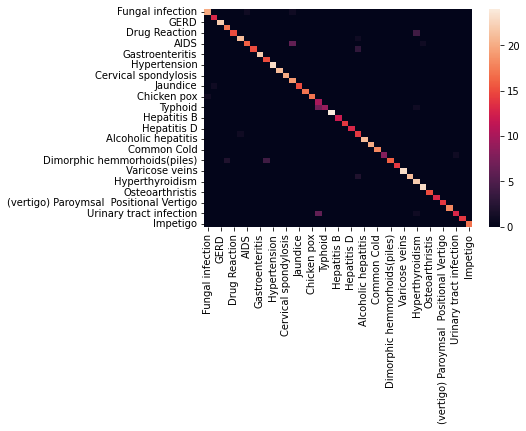

In [8]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [9]:
def message():
    if (Symptom1.get() == "None" and  Symptom2.get() == "None" and Symptom3.get() == "None" and Symptom4.get() == "None" and Symptom5.get() == "None"):
        messagebox.showinfo("OPPS!!", "ENTER  SYMPTOMS PLEASE")
    else :
        SVM()

def SVM():
    psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]
    loc = location.get()
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]

    nulls = [0,0,0,0,0,0,0,0,0,0,0,0]
    psy = [psymptoms + nulls]

    pred2 = model.predict(psy)
    t3.delete("1.0", END)
    t3.insert(END, pred2[0])

    if(pred2[0]=="GERD"):
        z=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=MP77HD9B13Z7N6BO&field1=1&field2=0&field3='+str(loc))
        z.read()
    if(pred2[0]=="Hepatitis C"):
        r=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=MP77HD9B13Z7N6BO&field1=0&field2=1&field3='+str(loc))
        r.read()

In [10]:
root = Tk()
root.title(" Disease Prediction From Symptoms")
root.configure(bg='green')

Symptom1 = StringVar()
Symptom1.set(None)
Symptom2 = StringVar()
Symptom2.set(None)
Symptom3 = StringVar()
Symptom3.set(None)
Symptom4 = StringVar()
Symptom4.set(None)
Symptom5 = StringVar()
Symptom5.set(None)
location = StringVar()
location.set(None)

w2 = Label(root, justify=CENTER, text=" Disease Prediction From Symptoms ")
w2.config(bg='orange red',font=("Times New Roman", 30))
w2.grid(row=1, column=0, columnspan=2, padx=100)

NameLb1 = Label(root, text="")
NameLb1.config(bg='misty rose',font=("Helvetica", 20))
NameLb1.grid(row=5, column=1, pady=10,  sticky=W)

S1Lb = Label(root,  text="Symptom 1")
S1Lb.config(bg='khaki1',font=("Helvetica", 15))
S1Lb.grid(row=7, column=1, pady=10 , sticky=W)

S2Lb = Label(root,  text="Symptom 2")
S2Lb.config(bg='khaki1',font=("Helvetica", 15))
S2Lb.grid(row=8, column=1, pady=10, sticky=W)

S3Lb = Label(root,  text="Symptom 3")
S3Lb.config(bg='khaki1',font=("Helvetica", 15))
S3Lb.grid(row=9, column=1, pady=10, sticky=W)

S4Lb = Label(root,  text="Symptom 4")
S4Lb.config(bg='khaki1',font=("Helvetica", 15))
S4Lb.grid(row=10, column=1, pady=10, sticky=W)

S5Lb = Label(root,  text="Symptom 5")
S5Lb.config(bg='khaki1',font=("Helvetica", 15))
S5Lb.grid(row=11, column=1, pady=10, sticky=W)

locLb = Label(root,  text="Location")
locLb.config(bg='khaki1',font=("Helvetica", 15))
locLb.grid(row=12, column=1, pady=10, sticky=W)

lr = Button(root, text="Predict",bg='gold',height=2, width=20, command=message)
lr.config(font=("Helvetica", 15))
lr.grid(row=15, column=1,pady=10)

#OPTIONS = sorted(symptoms)
OPTIONS = ["fatigue", "yellowish_skin", "loss_of_appetite", "yellowing_of_eyes", 'family_history',"stomach_pain", "ulcers_on_tongue", "vomiting", "cough", "chest_pain"]
LOCATIONS = ["New Delhi", "Mumbai", "Chennai", "Kolkata", "Bengaluru"]

S1En = OptionMenu(root, Symptom1,*OPTIONS)
S1En.grid(row=7, column=1)

S2En = OptionMenu(root, Symptom2,*OPTIONS)
S2En.grid(row=8, column=1)

S3En = OptionMenu(root, Symptom3,*OPTIONS)
S3En.grid(row=9, column=1)

S4En = OptionMenu(root, Symptom4,*OPTIONS)
S4En.grid(row=10, column=1)

S5En = OptionMenu(root, Symptom5,*OPTIONS)
S5En.grid(row=11, column=1)

LocEn = OptionMenu(root, location,*LOCATIONS)
LocEn.grid(row=12, column=1)

NameLb = Label(root, text="")
NameLb.config(bg='green',font=("Helvetica", 20))
NameLb.grid(row=13, column=1, pady=10,  sticky=W)

NameLb = Label(root, text="")
NameLb.config(bg='misty rose',font=("Helvetica", 15))
NameLb.grid(row=18, column=1, pady=10,  sticky=W)

t3 = Text(root, height=2, width=20)
t3.config(bg='orange',font=("Helvetica", 20))
t3.grid(row=19, column=1 , padx=10)

root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\devpu\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\devpu\AppData\Local\Temp\ipykernel_23416\1230797006.py", line 5, in message
    SVM()
  File "C:\Users\devpu\AppData\Local\Temp\ipykernel_23416\1230797006.py", line 25, in SVM
    z=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=MP77HD9B13Z7N6BO&field1=1&field2=0&field3='+str(loc))
  File "C:\Users\devpu\anaconda3\lib\urllib\request.py", line 214, in urlopen
    return opener.open(url, data, timeout)
  File "C:\Users\devpu\anaconda3\lib\urllib\request.py", line 517, in open
    response = self._open(req, data)
  File "C:\Users\devpu\anaconda3\lib\urllib\request.py", line 534, in _open
    result = self._call_chain(self.handle_open, protocol, protocol +
  File "C:\Users\devpu\anaconda3\lib\urllib\request.py", line 494, in _call_chain
    result = func(*args)
  File "C:\Users\devp